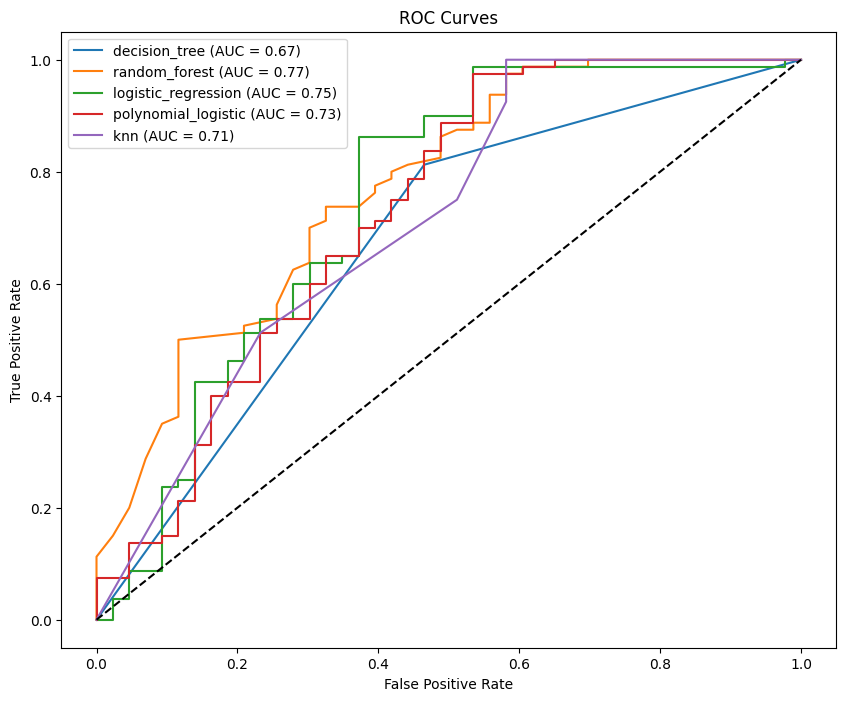

                 Model  Accuracy  Precision  Recall  F1-Score   ROC-AUC
0        decision_tree  0.715447   0.764706  0.8125  0.787879  0.673692
1        random_forest  0.772358   0.754902  0.9625  0.846154  0.771802
2  logistic_regression  0.788618   0.759615  0.9875  0.858696  0.745058
3  polynomial_logistic  0.788618   0.764706  0.9750  0.857143  0.727907
4                  svm  0.780488   0.757282  0.9750  0.852459  0.696802
5                  knn  0.747967   0.747475  0.9250  0.826816  0.712791


In [2]:
# Box 3: Model Evaluation
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load preprocessed data
df = pd.read_csv('preprocessed_loan_data.csv')

# Split data
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model names
model_names = ['decision_tree', 'random_forest', 'logistic_regression', 'polynomial_logistic', 'svm', 'knn']

# Initialize results dictionary
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# Evaluate each model
plt.figure(figsize=(10, 8))
for name in model_names:
    # Load model
    with open(f'{name}.pkl', 'rb') as f:
        model = pickle.load(f)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['F1-Score'].append(f1_score(y_test, y_pred))
    
    # ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    else:
        roc_auc = roc_auc_score(y_test, y_pred)
    
    results['ROC-AUC'].append(roc_auc)

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Save results
results_df.to_csv('model_evaluation_results.csv', index=False)

# การวิเคราะห์ผลลัพธ์โมเดล Machine Learning

จากการประเมินโมเดลทั้ง 6 ตัว (Decision Tree, Random Forest, Logistic Regression, Polynomial Logistic, SVM, KNN) โดยใช้เมตริก Accuracy, Precision, Recall, F1-Score และ ROC-AUC พบว่าแต่ละโมเดลมีจุดเด่นและจุดด้อยแตกต่างกัน ดังนี้:

- **Logistic Regression** และ **Polynomial Logistic** มี **Accuracy** สูงสุด (0.7886) แสดงถึงความสามารถในการทำนายผลลัพธ์โดยรวมที่ดี
- **Random Forest** มี **F1-Score** สูงสุด (0.8462) และ **ROC-AUC** สูงสุด (0.7718) ซึ่งบ่งชี้ว่าโมเดลนี้สมดุลระหว่าง Precision และ Recall และสามารถแยกแยะคลาสได้ดีในภาพรวม
- **Logistic Regression** มี **Recall** สูงสุด (0.9875) เหมาะสำหรับกรณีที่ต้องการลด False Negative (เช่น ไม่อยากพลาดการทำนายว่าให้กู้ได้)
- **Decision Tree** มีประสิทธิภาพต่ำสุดในทุกเมตริก (Accuracy 0.7154, ROC-AUC 0.6737) อาจเกิดจาก overfitting หรือไม่สามารถจับ pattern ที่ซับซ้อนได้ดี
- **SVM** และ **KNN** มีผลลัพธ์อยู่ในระดับปานกลาง โดย SVM มี Recall สูง (0.9750) แต่ ROC-AUC ต่ำกว่า Random Forest และ Logistic Regression
- **Polynomial Logistic** คล้ายกับ Logistic Regression แต่ ROC-AUC ต่ำกว่าเล็กน้อย (0.7279) อาจเพราะความซับซ้อนของ polynomial features ไม่ได้ช่วยมากใน dataset นี้

## สรุป: โมเดลที่ดีที่สุด
**Random Forest** เป็นโมเดลที่เก่งที่สุดในที่นี้ เพราะมี **F1-Score** สูงสุด (0.8462) และ **ROC-AUC** สูงสุด (0.7718) ซึ่งแสดงถึงความสมดุลระหว่างความแม่นยำและความครอบคลุม รวมถึงความสามารถในการแยกแยะคลาสได้ดีที่สุด อย่างไรก็ตาม หากเน้น Recall สูงสุด (เช่น ไม่อยากพลาดเคสที่ควรให้กู้) **Logistic Regression** จะเป็นตัวเลือกที่ดี

## เหตุผลที่เลือก Random Forest
- **F1-Score** สูง แสดงถึงความสมดุลระหว่าง Precision และ Recall
- **ROC-AUC** สูงสุด บ่งบอกถึงความสามารถในการแยกคลาสได้ดี
- ความยืดหยุ่นของ Random Forest ที่ใช้ ensemble method ทำให้ลดปัญหา overfitting เมื่อเทียบกับ Decision Tree

# การเลือกโมเดลสำหรับสถานการณ์ต่าง ๆ ของธนาคาร

จากผลลัพธ์การประเมินโมเดล (Accuracy, Precision, Recall, F1-Score, ROC-AUC) และสถานการณ์สมมติของธนาคาร รวมถึงบริบทเศรษฐกิจการเงินของธนาคารไทยพาณิชย์ในปัจจุบัน (กันยายน 2568) ดังนี้:

## สถานการณ์ที่ 1: ธนาคารใกล้เจ๊ง ไม่อยากให้มีหนี้เสียเพิ่ม
- **เป้าหมาย**: ลด False Positive (ทำนายว่าให้กู้ได้ แต่จริง ๆ ไม่ควรให้) เพื่อลดหนี้เสีย (NPL)
- **เมตริกสำคัญ**: **Precision** สูง (เพื่อให้แน่ใจว่าคนที่อนุมัติกู้มีโอกาสชำระคืนสูง)
- **โมเดลที่เหมาะสม**: **Decision Tree** (Precision = 0.7647) หรือ **Random Forest** (Precision = 0.7549)
- **เหตุผล**: Decision Tree มี Precision สูงสุด รองลงมาคือ Random Forest ซึ่งมีความสมดุลและลดความเสี่ยง overfitting ได้ดีกว่า Decision Tree
- **คำแนะนำ**: ใช้ **Random Forest** เพราะ Precision สูงและ ROC-AUC (0.7718) ดีกว่า Decision Tree (0.6737) แสดงถึงความสามารถในการแยกคลาสที่ดีกว่า

## สถานการณ์ที่ 2: เศรษฐกิจดี ธนาคารมีเงินเหลือ อยากผลักดันเศรษฐกิจ
- **เป้าหมาย**: เพิ่มโอกาสให้กู้ (ลด False Negative) เพื่อกระตุ้นการปล่อยสินเชื่อ
- **เมตริกสำคัญ**: **Recall** สูง (เพื่อให้ครอบคลุมผู้ที่ควรได้กู้มากที่สุด)
- **โมเดลที่เหมาะสม**: **Logistic Regression** (Recall = 0.9875)
- **เหตุผล**: Logistic Regression มี Recall สูงสุด ช่วยให้ธนาคารอนุมัติสินเชื่อได้มากขึ้น กระตุ้นเศรษฐกิจโดยไม่พลาดโอกาสปล่อยกู้ให้ลูกค้าที่มีศักยภาพ
- **คำแนะนำ**: ใช้ Logistic Regression ร่วมกับการปรับ threshold เพื่อเพิ่ม Recall มากขึ้น และพิจารณาการใช้ Polynomial Logistic หากต้องการจับ pattern ที่ซับซ้อนกว่า

## สถานการณ์ที่ 3: การเงินปัจจุบันของธนาคารไทยพาณิชย์ (SCB)
- **บริบท (จากข้อมูลล่าสุด)**: 
  - ธนาคารไทยพาณิชย์ (SCB) มีผลกำไรสุทธิเติบโต 7.3% ในปี 2567 (249 พันล้านบาท) และเน้นการปรับปรุงคุณภาพสินทรัพย์และลดต้นทุนเครดิต [][](https://www.muralpay.com/blog/top-banks-in-thailand-compare-fees-services)
  - ระบบธนาคารไทยโดยรวมแข็งแกร่ง มีเงินกองทุนและสำรองหนี้สูง แต่ต้องระวังหนี้เสียจาก SMEs และครัวเรือนที่รายได้ฟื้นตัวช้า [][](https://www.bot.or.th/en/news-and-media/news/news-20240219.html)
  - SCB เน้นกลยุทธ์ดิจิทัลและการเงินยั่งยืน รวมถึงการพัฒนาแพลตฟอร์มอย่าง SCB Easy และ PromptBiz [,][](https://www.scb.co.th/en/personal-banking.html)[](https://www.muralpay.com/blog/top-banks-in-thailand-compare-fees-services)
- **เป้าหมาย**: รักษาสมดุลระหว่างการเติบโตของสินเชื่อและการควบคุมหนี้เสีย พร้อมสนับสนุนการเงินดิจิทัลและยั่งยืน
- **โมเดลที่เหมาะสม**: **Random Forest**
- **เหตุผล**: 
  - Random Forest มี **F1-Score** สูงสุด (0.8462) และ **ROC-AUC** สูงสุด (0.7718) แสดงถึงความสมดุลระหว่าง Precision และ Recall
  - เหมาะกับสถานการณ์ที่ต้องการทั้งควบคุมความเสี่ยงหนี้เสีย (Precision สูง) และขยายโอกาสปล่อยสินเชื่อ (Recall สูง)
  - ความสามารถในการจับ pattern ที่ซับซ้อนช่วยให้เหมาะกับ dataset ที่หลากหลายของ SCB ซึ่งครอบคลุมทั้งลูกค้าบุคคลและ SMEs
- **คำแนะนำ**: 
  - ใช้ Random Forest ร่วมกับ feature importance เพื่อระบุปัจจัยสำคัญ (เช่น Credit_History, ApplicantIncome) ที่ส่งผลต่อการอนุมัติกู้
  - รวมข้อมูลดิจิทัล (เช่น พฤติกรรมการใช้ SCB Easy App) เพื่อเพิ่มประสิทธิภาพโมเดล
  - พิจารณาการใช้ ensemble กับ Logistic Regression เพื่อเพิ่มความยืดหยุ่นในสถานการณ์เศรษฐกิจผันผวน

## สรุป
- **สถานการณ์ธนาคารใกล้เจ๊ง**: Random Forest (เน้น Precision เพื่อลดหนี้เสีย)
- **สถานการณ์เศรษฐกิจดี**: Logistic Regression (เน้น Recall เพื่อกระตุ้นสินเชื่อ)
- **สถานการณ์ปัจจุบันของ SCB**: Random Forest (สมดุลและเหมาะกับบริบทการเงินที่แข็งแกร่งแต่ต้องระวัง NPL)